# RNN Step Forward

In [1]:
from code_base.rnn_layers import rnn_step_forward
from code_base.layer_utils import rel_error
import numpy as np

N, D, H = 3, 10, 4
x = np.linspace(-0.4, 0.7, num=N*D).reshape(N, D)
prev_h = np.linspace(-0.2, 0.5, num=N*H).reshape(N, H)
Wx = np.linspace(-0.1, 0.9, num=D*H).reshape(D, H)
Wh = np.linspace(-0.3, 0.7, num=H*H).reshape(H, H)
b = np.linspace(-0.2, 0.4, num=H)
next_h, _ = rnn_step_forward(x, prev_h, Wx, Wh, b)
expected_next_h = np.asarray([
[-0.58172089, -0.50182032, -0.41232771, -0.31410098],
[ 0.66854692, 0.79562378, 0.87755553, 0.92795967],
[ 0.97934501, 0.99144213, 0.99646691, 0.99854353]])
print('next_h error: ', rel_error(expected_next_h, next_h))

next_h error:  1.8503734797e-09


In [2]:
from code_base.rnn_layers import rnn_step_forward
import numpy as np

x_shape = (3, 874)
Wx_shape = (874, 128)
h_shape = (3, 128)
Wh_shape = (128, 128)
b_shape = (128,)
x = np.loadtxt('./input_files/x.csv', delimiter=',')
x = x.reshape(x_shape)
Wx = np.loadtxt('./input_files/Wx.csv', delimiter=',')
Wx = Wx.reshape(Wx_shape)
prev_h = np.loadtxt('./input_files/prev_h.csv', delimiter=',')
prev_h = prev_h.reshape(h_shape)
Wh = np.loadtxt('./input_files/Wh.csv', delimiter=',')
Wh = Wh.reshape(Wh_shape)
b = np.loadtxt('./input_files/b.csv', delimiter=',')
out, _ = rnn_step_forward(x, prev_h, Wx, Wh, b)
np.savetxt('./output_files/rnn_step_forward_out.csv', out.ravel(), delimiter=',')

# RNN Step Backward

In [3]:
from code_base.rnn_layers import rnn_step_forward, rnn_step_backward
from code_base.gradient_check import *
from code_base.layer_utils import rel_error
import numpy as np

N, D, H = 4, 5, 6
x = np.random.randn(N, D)
h = np.random.randn(N, H)
Wx = np.random.randn(D, H)
Wh = np.random.randn(H, H)
b = np.random.randn(H)
out, cache = rnn_step_forward(x, h, Wx, Wh, b)
dnext_h = np.random.randn(*out.shape)
fx = lambda x: rnn_step_forward(x, h, Wx, Wh, b)[0]
fh = lambda prev_h: rnn_step_forward(x, h, Wx, Wh, b)[0]
fWx = lambda Wx: rnn_step_forward(x, h, Wx, Wh, b)[0]
fWh = lambda Wh: rnn_step_forward(x, h, Wx, Wh, b)[0]
fb = lambda b: rnn_step_forward(x, h, Wx, Wh, b)[0]
dx_num = eval_numerical_gradient_array(fx, x, dnext_h)
dprev_h_num = eval_numerical_gradient_array(fh, h, dnext_h)
dWx_num = eval_numerical_gradient_array(fWx, Wx, dnext_h)
dWh_num = eval_numerical_gradient_array(fWh, Wh, dnext_h)
db_num = eval_numerical_gradient_array(fb, b, dnext_h)
dx, dprev_h, dWx, dWh, db = rnn_step_backward(dnext_h, cache)
print('dx error: ', rel_error(dx_num, dx))
print('dprev_h error: ', rel_error(dprev_h_num, dprev_h))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db))

dx error:  8.76422864039e-11
dprev_h error:  9.98826196438e-11
dWx error:  3.96721710693e-11
dWh error:  1.3358060921e-10
db error:  2.7847821432e-11


In [4]:
from code_base.rnn_layers import rnn_step_forward, rnn_step_backward
import numpy as np

x_shape = (3, 874)
Wx_shape = (874, 128)
h_shape = (3, 128)
Wh_shape = (128, 128)
b_shape = (128,)
x = np.loadtxt('./input_files/x.csv', delimiter=',')
x = x.reshape(x_shape)
Wx = np.loadtxt('./input_files/Wx.csv', delimiter=',')
Wx = Wx.reshape(Wx_shape)
prev_h = np.loadtxt('./input_files/prev_h.csv', delimiter=',')
prev_h = prev_h.reshape(h_shape)
Wh = np.loadtxt('./input_files/Wh.csv', delimiter=',')
Wh = Wh.reshape(Wh_shape)
b = np.loadtxt('./input_files/b.csv', delimiter=',')
out, cache = rnn_step_forward(x, prev_h, Wx, Wh, b)
dhout = np.loadtxt('./input_files/dho.csv', delimiter=',')
dx, dh, dWx, dWh, db = rnn_step_backward(dhout, cache)
np.savetxt('./output_files/rnn_step_backward_out_dx.csv', dx.ravel(), delimiter=',')
np.savetxt('./output_files/rnn_step_backward_out_dh.csv', dh.ravel(), delimiter=',')
np.savetxt('./output_files/rnn_step_backward_out_dwx.csv', dWx.ravel(), delimiter=',')
np.savetxt('./output_files/rnn_step_backward_out_dwh.csv', dWh.ravel(), delimiter=',')
np.savetxt('./output_files/rnn_step_backward_out_db.csv', db.ravel(), delimiter=',')

# RNN Forward

In [5]:
from code_base.rnn_layers import rnn_forward
from code_base.layer_utils import *
import numpy as np

N, T, D, H = 2, 3, 4, 5
x = np.linspace(-0.1, 0.3, num=N*T*D).reshape(N, T, D)
h0 = np.linspace(-0.3, 0.1, num=N*H).reshape(N, H)
Wx = np.linspace(-0.2, 0.4, num=D*H).reshape(D, H)
Wh = np.linspace(-0.4, 0.1, num=H*H).reshape(H, H)
b = np.linspace(-0.7, 0.1, num=H)
h, _ = rnn_forward(x, h0, Wx, Wh, b)
expected_h = np.asarray([
[[-0.42070749, -0.27279261, -0.11074945, 0.05740409, 0.22236251],
[-0.39525808, -0.22554661, -0.0409454, 0.14649412, 0.32397316],
[-0.42305111, -0.24223728, -0.04287027, 0.15997045, 0.35014525],],
[[-0.55857474, -0.39065825, -0.19198182, 0.02378408, 0.23735671],
[-0.27150199, -0.07088804, 0.13562939, 0.33099728, 0.50158768],
[-0.51014825, -0.30524429, -0.06755202, 0.17806392, 0.40333043]]])
print('h error: ', rel_error(expected_h, h))

h error:  1.04522949367e-08


In [6]:
from code_base.rnn_layers import rnn_forward
import numpy as np

x_all_shape = (3, 5, 874)
Wx_shape = (874, 128)
h_shape = (3, 128)
Wh_shape = (128, 128)
b_shape = (128,)
x_all = np.loadtxt('./input_files/x_all.csv', delimiter=',')
x_all = x_all.reshape(x_all_shape)
Wx = np.loadtxt('./input_files/Wx.csv', delimiter=',')
Wx = Wx.reshape(Wx_shape)
h0 = np.loadtxt('./input_files/prev_h.csv', delimiter=',')
h0 = prev_h.reshape(h_shape)
Wh = np.loadtxt('./input_files/Wh.csv', delimiter=',')
Wh = Wh.reshape(Wh_shape)
b = np.loadtxt('./input_files/b.csv', delimiter=',')
out, _ = rnn_forward(x_all, h0, Wx, Wh, b)
np.savetxt('./output_files/rnn_forward_out.csv', out.ravel(), delimiter=',')

# RNN Backward

In [7]:
from code_base.rnn_layers import rnn_forward, rnn_backward
from code_base.gradient_check import *
from code_base.layer_utils import *
import numpy as np

N, D, T, H = 2, 3, 10, 5
x = np.random.randn(N, T, D)
h0 = np.random.randn(N, H)
Wx = np.random.randn(D, H)
Wh = np.random.randn(H, H)
b = np.random.randn(H)
out, cache = rnn_forward(x, h0, Wx, Wh, b)
dout = np.random.randn(*out.shape)
dx, dh0, dWx, dWh, db = rnn_backward(dout, cache)
fx = lambda x: rnn_forward(x, h0, Wx, Wh, b)[0]
fh0 = lambda h0: rnn_forward(x, h0, Wx, Wh, b)[0]
fWx = lambda Wx: rnn_forward(x, h0, Wx, Wh, b)[0]
fWh = lambda Wh: rnn_forward(x, h0, Wx, Wh, b)[0]
fb = lambda b: rnn_forward(x, h0, Wx, Wh, b)[0]
dx_num = eval_numerical_gradient_array(fx, x, dout)
dh0_num = eval_numerical_gradient_array(fh0, h0, dout)
dWx_num = eval_numerical_gradient_array(fWx, Wx, dout)
dWh_num = eval_numerical_gradient_array(fWh, Wh, dout)
db_num = eval_numerical_gradient_array(fb, b, dout)
print('dx error: ', rel_error(dx_num, dx))
print('dh0 error: ', rel_error(dh0_num, dh0))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db))

dx error:  1.03276117629e-10
dh0 error:  9.83060124999e-11
dWx error:  2.28019753333e-10
dWh error:  2.67111432307e-10
db error:  3.90152423632e-10


In [8]:
from code_base.rnn_layers import rnn_forward, rnn_backward
import numpy as np

x_all_shape = (3, 5, 874)
Wx_shape = (874, 128)
h_shape = (3, 128)
Wh_shape = (128, 128)
b_shape = (128,)
dh_all_shape = (3, 5, 128)
x_all = np.loadtxt('./input_files/x_all.csv', delimiter=',')
x_all = x_all.reshape(x_all_shape)
Wx = np.loadtxt('./input_files/Wx.csv', delimiter=',')
Wx = Wx.reshape(Wx_shape)
h0 = np.loadtxt('./input_files/prev_h.csv', delimiter=',')
h0 = h0.reshape(h_shape)
Wh = np.loadtxt('./input_files/Wh.csv', delimiter=',')
Wh = Wh.reshape(Wh_shape)
b = np.loadtxt('./input_files/b.csv', delimiter=',')
out, cache = rnn_forward(x_all, h0, Wx, Wh, b)
dhout = np.loadtxt('./input_files/dho_all.csv', delimiter=',')
dhout = dhout.reshape(dh_all_shape)
dx_all, dh0, dWx, dWh, db = rnn_backward(dhout, cache)
np.savetxt('./output_files/rnn_backward_out_dx.csv', dx_all.ravel(), delimiter=',')
np.savetxt('./output_files/rnn_backward_out_dh0.csv', dh0.ravel(), delimiter=',')
np.savetxt('./output_files/rnn_backward_out_dwx.csv', dWx.ravel(), delimiter=',')
np.savetxt('./output_files/rnn_backward_out_dwh.csv', dWh.ravel(), delimiter=',')
np.savetxt('./output_files/rnn_backward_out_db.csv', db.ravel(), delimiter=',')

# (Optional) Temporal Bi-directional Concatenation Forward

In [ ]:
from code_base.rnn_layers import bidirectional_rnn_concatenate_forward
from code_base.layer_utils import *
import numpy as np

N, T, H = 2, 4, 3
h = np.linspace(-0.5, 0, num=N*T*H).reshape(N, T, H)
hr = np.linspace(0, 0.5, num=N*T*H).reshape(N, T, H)
mask = np.ones((N,T))
mask[0][3] = 0 # length of s1 is 3
mask[1][2] = mask[1][3] = 0 # length of s2 is 2
ho, _ = bidirectional_rnn_concatenate_forward(h, hr, mask)
expected_ho = np.array([[
[-0.5, -0.47826087, -0.45652174, 0.13043478, 0.15217391, 0.17391304],
[-0.43478261, -0.41304348, -0.39130435, 0.06521739, 0.08695652, 0.10869565],
[-0.36956522, -0.34782609, -0.32608696, 0., 0.02173913, 0.04347826],
[0., 0., 0., 0., 0., 0.]],
[[-0.23913043, -0.2173913 , -0.19565217, 0.32608696, 0.34782609, 0.36956522],
[-0.17391304, -0.15217391, -0.13043478, 0.26086957, 0.2826087, 0.30434783],
[0., 0., 0., 0., 0., 0.],
[0., 0., 0., 0., 0., 0.]]])
print('ho error: ', rel_error(expected_ho, ho, mask))

In [ ]:
from code_base.rnn_layers import bidirectional_rnn_concatenate_forward
from code_base.gradient_check import *
import numpy as np

h_shape = (3, 5, 128)
mask_shape = (3, 5)
h = np.loadtxt('./input_files/h_all.csv', delimiter=',')
h = h.reshape(h_shape)
hr = np.loadtxt('./input_files/h_all_r.csv', delimiter=',')
hr = hr.reshape(h_shape)
mask = np.loadtxt('./input_files/mask.csv', delimiter=',')
mask = mask.reshape(mask_shape)
hout, _ = bidirectional_rnn_concatenate_forward(h, hr, mask)
np.savetxt('./output_files/bidirectional_rnn_concatenate_forward_out.csv', hout.ravel(), delimiter=',')

# (Optional) Temporal Bi-directional Concatenation Backward

In [ ]:
from code_base.rnn_layers import bidirectional_rnn_concatenate_forward, bidirectional_rnn_concatenate_backward
from code_base.layer_utils import *
from code_base.gradient_check import *
import numpy as np

N, T, H = 2, 4, 3
h = np.linspace(-0.5, 0, num=N*T*H).reshape(N, T, H)
hr = np.linspace(0, 0.5, num=N*T*H).reshape(N, T, H)
mask = np.ones((N,T))
mask[0][3] = 0 # length of s1 is 3
mask[1][2] = mask[1][3] = 0 # length of s2 is 2
ho, cache = bidirectional_rnn_concatenate_forward(h, hr, mask)
dho = np.linspace(0., 0.5, num=N*T*2*H).reshape(N, T, 2*H)
dh, dhr = bidirectional_rnn_concatenate_backward(dho, cache)
fh = lambda h: bidirectional_rnn_concatenate_forward(h, hr, mask)[0]
fhr = lambda hr: bidirectional_rnn_concatenate_forward(h, hr, mask)[0]
dh_num = eval_numerical_gradient_array(fh, h, dho)
dhr_num = eval_numerical_gradient_array(fhr, hr, dho)
print('dh error: ', rel_error(dh_num, dh, mask))
print('dhr error: ', rel_error(dhr_num, dhr, mask))

In [ ]:
from code_base.rnn_layers import bidirectional_rnn_concatenate_forward, bidirectional_rnn_concatenate_backward
import numpy as np

h_shape = (3, 5, 128)
mask_shape = (3, 5)
h = np.loadtxt('./input_files/h_all.csv', delimiter=',')
h = h.reshape(h_shape)
hr = np.loadtxt('./input_files/h_all_r.csv', delimiter=',')
hr = hr.reshape(h_shape)
mask = np.loadtxt('./input_files/mask.csv', delimiter=',')
mask = mask.reshape(mask_shape)
hout, cache = bidirectional_rnn_concatenate_forward(h, hr, mask)
dhout = np.loadtxt('./input_files/dhc_all.csv', delimiter=',')
dhout = dhout.reshape(3, 5, 256)
dh, dhr = bidirectional_rnn_concatenate_backward(dhout, cache)
np.savetxt('./output_files/bidirectional_rnn_concatenate_backward_out_h.csv', dh.ravel(), delimiter=',')
np.savetxt('./output_files/bidirectional_rnn_concatenate_backward_out_hr.csv', dhr.ravel(), delimiter=',')

# RNN for Sentiment Analysis - Forward Pass

In [9]:
from code_base.classifiers.rnn import *
# If you do brnn, please import from code_base.classifiers.brnn instead
import numpy as np

N, H, A, O = 2, 6, 5, 2
word_to_idx = { 'awesome': 0, 'reading':1, 'pretty': 2, 'dog': 3, 'movie': 4,
                'liked': 5, 'most': 6, 'admired': 7, 'bad': 8, 'fucking': 9}
V = len(word_to_idx)
T = 4
model = SentimentAnalysisRNN(word_to_idx,
    hidden_dim=H,
    fc_dim=A,
    output_dim=O,
    cell_type='rnn',
    dtype=np.float64)
# Set all model parameters to fixed values
for k, v in model.params.items():
    model.params[k] = np.linspace(-1.4, 1.3, num=v.size).reshape(*v.shape)
labels = np.array([1, 0], dtype=np.int32)
wordvecs = np.zeros((N, T, V))
wordvecs[0, 0, 0] = wordvecs[0, 1, 5] = wordvecs[0, 2, 2] = wordvecs[0, 3, 7] = 1
wordvecs[1, 0, 4] = wordvecs[1, 1, 8] = wordvecs[1, 2, 5] = 1
mask = np.ones((N, T))
mask[1, 3] = 0
loss, grads = model.loss(wordvecs, labels, mask)
expected_loss = 2.99619226823
# For brnn, the expected_loss should be 2.9577205234
print('loss: ', loss)
print('expected loss: ', expected_loss)
print('difference: ', abs(loss - expected_loss))

loss:  2.99619226823
expected loss:  2.99619226823
difference:  1.38733469157e-12


# RNN for Sentiment Analysis - Backward Pass

In [10]:
from code_base.classifiers.rnn import *
# If you do brnn, please import from code_base.classifiers.brnn instead
from code_base.gradient_check import *
from code_base.layer_utils import rel_error
import numpy as np

N, T, H, A, O = 2, 4, 6, 5, 2
word_to_idx = {'awesome': 0, 'reading':1, 'pretty': 2, 'dog': 3, 'movie': 4,
                'liked': 5, 'most': 6, 'admired': 7, 'bad': 8, 'fucking': 9}
V = len(word_to_idx)
labels = np.array([1, 0], dtype=np.int32)
wordvecs = np.zeros((N, T, V))
wordvecs[0, 0, 0] = wordvecs[0, 1, 5] = wordvecs[0, 2, 2] = wordvecs[0, 3, 7] = 1
wordvecs[1, 0, 4] = wordvecs[1, 1, 8] = wordvecs[1, 2, 5] = 1
mask = np.ones((N, T))
mask[1, 3] = 0
model = SentimentAnalysisRNN(word_to_idx,
    hidden_dim=H,
    fc_dim=A,
    output_dim=O,
    cell_type='rnn',
    dtype=np.float64,
)
loss, grads = model.loss(wordvecs, labels, mask)
for param_name in sorted(grads):
    f = lambda _: model.loss(wordvecs, labels, mask)[0]
    param_grad_num = eval_numerical_gradient(f, model.params[param_name],
verbose=False, h=1e-6)
    e = rel_error(param_grad_num, grads[param_name])
    print('%s relative error: %e' % (param_name, e))

W_a relative error: 2.470576e-09
W_fc relative error: 2.570464e-10
Wh relative error: 1.117105e-07
Wx relative error: 4.387683e-08
b relative error: 9.065656e-09
b_a relative error: 1.536972e-09
b_fc relative error: 4.681212e-12


# Training/Inference on Small Data

[nltk_data] Downloading package punkt to /Users/waiyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
(Iteration 1 / 100) loss: 0.315483
(Iteration 11 / 100) loss: 0.277323
(Iteration 21 / 100) loss: 0.243838
(Iteration 31 / 100) loss: 0.212798
(Iteration 41 / 100) loss: 0.183810
(Iteration 51 / 100) loss: 0.157254
(Iteration 61 / 100) loss: 0.133639
(Iteration 71 / 100) loss: 0.113249
(Iteration 81 / 100) loss: 0.096055
(Iteration 91 / 100) loss: 0.081789


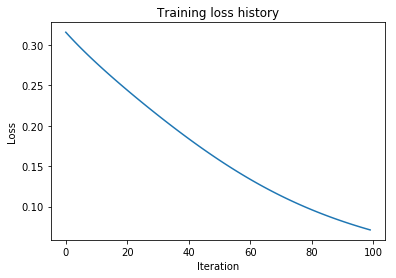

In [11]:
from code_base.sentiment_analysis_solver import *
from code_base.classifiers.rnn import *
# If you do brnn, please import from code_base.classifiers.brnn instead
from code_base.data_utils import *
import matplotlib.pyplot as plt
import numpy as np

download_corpus()
small_data = load_data('code_base/datasets/train.csv', sample=True)
small_rnn_model = SentimentAnalysisRNN(
    cell_type='rnn',
    word_to_idx=load_dictionary('code_base/datasets/dictionary.csv')
)
small_rnn_solver = SentimentAnalysisSolver(small_rnn_model,
    small_data,
    update_rule='sgd',
    num_epochs=100,
    batch_size=100,
    optim_config={
        'learning_rate': 5e-3,
    },
    lr_decay=1.0,
    verbose=True,
    print_every=10,
)
small_rnn_solver.train()

# we will use the same batch of training data for inference
# this is just to let you know the procedure of inference
preds = small_rnn_solver.test(split='train')
np.savetxt('./output_files/rnn_prediction_prob.csv', preds.ravel(), delimiter=',')
# If you do brnn, please save result to ./output_files/brnn_prediction_prob.csv

# Plot the training losses
plt.plot(small_rnn_solver.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()